
## **1. Project Overview**
[🌐 Project Website (GitHub Pages)](https://github.com/NoMooncake/YueWu3160)

# Video Popularity and Engagement Trends on TikTok and YouTube

This project explores and compares the factors that drive video virality and audience engagement on two of the most popular platforms: TikTok and YouTube. The primary research goals are:

- What features (e.g., number of views, shares, video metadata) are most strongly associated with high user engagement (likes, comments)?
- Are there platform-specific differences in what drives audience interactions?

To answer these questions, I work with two large-scale datasets:

- **TikTok Trending Videos**: Extracted from [source], including fields such as video length, number of likes, shares, comments, and plays.
- **YouTube Trending Videos**: Collected from Kaggle’s public dataset, containing views, likes, comment counts, titles, and other metadata.

These datasets were selected because they represent real-world social media interactions and enable meaningful cross-platform comparisons. The project involves ETL processing, exploratory data analysis (EDA), and model development to identify how various features correlate with video popularity. Ultimately, I aim to uncover actionable insights into what makes content successful on different platforms.


I will use **Google Drive** to store the datasets and publish results on **GitHub Pages**. https://github.com/NoMooncake/YueWu3160

## **2. Selected Datasets**
###  TikTok & YouTube Trending Videos Datasets
These datasets are sourced from Kaggle and have been uploaded to Google Drive. The analysis will focus on:
- **TikTok Dataset** (stored at `/content/drive/MyDrive/Colab Notebooks/Data Science/Final/Tiktok/`)
- **YouTube Dataset** (stored at `/content/drive/MyDrive/Colab Notebooks/Data Science/Final/Youtube/`)

### **Research Questions**
1. What types of videos (duration, title style, music) are more likely to go viral on TikTok and YouTube?
2. What are the key factors influencing social media engagement (likes, comments, shares)?

## **3. Connecting Google Drive and Loading Data**


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load TikTok Dataset
tiktok_path = "/content/drive/MyDrive/Colab Notebooks/Data Science/Final/Tiktok/tiktok_liked_videos.csv"
tiktok_df = pd.read_csv(tiktok_path)

# Load YouTube Dataset
youtube_path = "/content/drive/MyDrive/Colab Notebooks/Data Science/Final/Youtube/USvideos.csv"
youtube_df = pd.read_csv(youtube_path)

# Display dataset samples
tiktok_df.head(), youtube_df.head()


(       user_name              user_id             video_id  \
 0  mickfleetwood  6878763511033054213  6879849755204259077   
 1  aarongoldyboy  6784404408140088326  6872809542338596101   
 2         abimhn  6757970616114070534  6863625541254155526   
 3   heybriajones  6609395315488342021  6862342029926616325   
 4   samuelgrubbs  6734403205457642502  6859886359826468101   
 
                                           video_desc  video_time  \
 0  @420doggface208 had it right. Dreams and Cranb...  1601839889   
 1  #duet with @dmichaelburke #greenscreen #lovest...  1600200680   
 2  mochi ice cream or rocks from the beach? 😂 #fy...  1598062361   
 3  So excited I can use the Alexa app to record v...  1597763517   
 4  Wait for it... this took us so so long, please...  1597191763   
 
    video_length                                         video_link  n_likes  \
 0            20  https://www.tiktok.com/@mickfleetwood/video/68...  1800000   
 1            59  https://www.tiktok.com/@aa


## **4. Data Cleaning (ETL: Extraction, Transformation, and Loading)**
Performed the following data cleaning steps:
- **Removed missing values** to ensure data integrity.
- **Converted date columns** to standardized datetime format.
- **Selected relevant columns** to retain key metrics.

### **Data Cleaning Process**


In [ ]:
print(tiktok_df.columns)
print(youtube_df.columns)

Index(['user_name', 'user_id', 'video_id', 'video_desc', 'video_time',
       'video_length', 'video_link', 'n_likes', 'n_shares', 'n_comments',
       'n_plays'],
      dtype='object')
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [ ]:
# Remove missing values
tiktok_df.dropna(inplace=True)
youtube_df.dropna(inplace=True)

# Convert timestamps (if available)
if 'upload_date' in tiktok_df.columns:
    tiktok_df['upload_date'] = pd.to_datetime(tiktok_df['upload_date'])
if 'publish_time' in youtube_df.columns:
    youtube_df['publish_time'] = pd.to_datetime(youtube_df['publish_time'])

# Select key columns
youtube_df = youtube_df[['video_id', 'title', 'views', 'likes', 'comment_count']]
tiktok_df = tiktok_df[['video_id', 'n_likes', 'n_shares', 'n_plays', 'n_comments']]

# Display cleaned data
tiktok_df.head(), youtube_df.head()


(              video_id  n_likes  n_shares   n_plays  n_comments
 0  6879849755204259077  1800000    105500   9500000       25100
 1  6872809542338596101   337000      5744   1300000        2490
 2  6863625541254155526   168500      5026    913400        1390
 3  6862342029926616325    48800       429    645400         658
 4  6859886359826468101  2800000     44300  15900000       25100,
       video_id                                              title    views  \
 0  2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   748374   
 1  1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...  2418783   
 2  5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...  3191434   
 3  puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   343168   
 4  d380meD0W0M                           I Dare You: GOING BALD!?  2095731   
 
     likes  comment_count  
 0   57527          15954  
 1   97185          12703  
 2  146033           8181  
 3   10172           


## **5. Exploratory Data Analysis (EDA)**
Computed key statistics and visualized trends in engagement metrics.

### **Basic Statistics**


In [ ]:
print("TikTok Dataset Statistics:\n", tiktok_df.describe())
print("\nYouTube Dataset Statistics:\n", youtube_df.describe())


TikTok Dataset Statistics:
            video_id       n_likes       n_shares       n_plays    n_comments
count  1.000000e+01  1.000000e+01      10.000000  1.000000e+01     10.000000
mean   6.853747e+18  9.328500e+05   20154.000000  7.083480e+06   7946.500000
std    1.784187e+16  1.086163e+06   33028.166828  6.746645e+06  10047.732428
min    6.820529e+18  1.770000e+04     323.000000  1.760000e+05    658.000000
25%    6.843423e+18  1.886000e+05    3410.750000  1.010050e+06    941.500000
50%    6.855444e+18  4.284500e+05    5385.000000  5.450000e+06   2582.500000
75%    6.863305e+18  1.521925e+06   20907.250000  1.377500e+07  12824.000000
max    6.879850e+18  2.800000e+06  105500.000000  1.630000e+07  25100.000000

YouTube Dataset Statistics:
               views         likes  comment_count
count  4.037900e+04  4.037900e+04   4.037900e+04
mean   2.370839e+06  7.461677e+04   8.287396e+03
std    7.428515e+06  2.296172e+05   3.431605e+04
min    5.490000e+02  0.000000e+00   0.000000e+00
25% 


### **Data Visualization**
Created scatter plots to explore the relationship between **views and likes** for TikTok and YouTube videos.


In [ ]:
print(youtube_df.columns)
print(youtube_df.dtypes)

Index(['video_id', 'title', 'views', 'likes', 'comment_count'], dtype='object')
video_id         object
title            object
views             int64
likes             int64
comment_count     int64
dtype: object


In [ ]:
youtube_df.columns = youtube_df.columns.str.strip()
print("views" in youtube_df.columns)

True


In [ ]:
youtube_df = youtube_df.reset_index(drop=True)

In [ ]:
print(youtube_df[['views', 'likes']].head())

     views   likes
0   748374   57527
1  2418783   97185
2  3191434  146033
3   343168   10172
4  2095731  132235


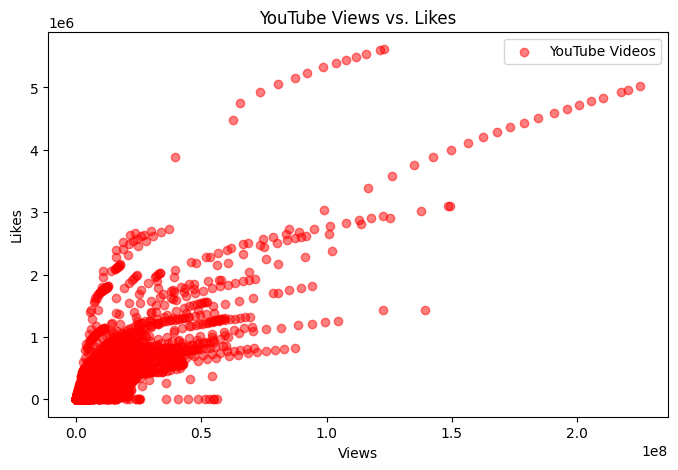

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(youtube_df['views'].values, youtube_df['likes'].values, alpha=0.5, color='red', label="YouTube Videos")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("YouTube Views vs. Likes")
plt.legend()
plt.show()



This scatter plot displays how likes are distributed relative to view counts on YouTube. It is useful for comparing engagement strength across popular videos.


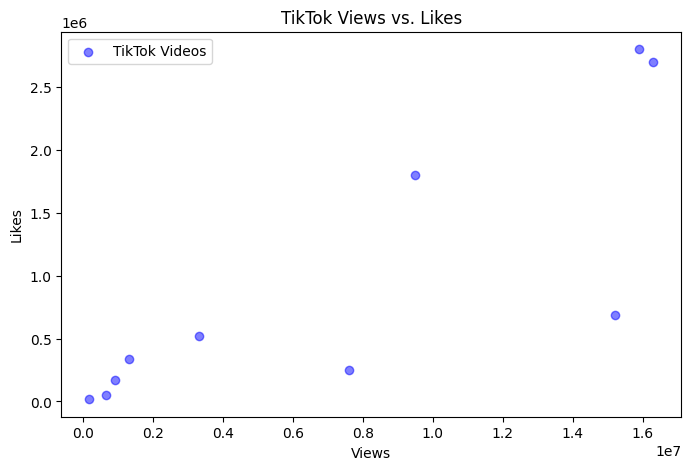

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(tiktok_df['n_plays'].values, tiktok_df['n_likes'].values, alpha=0.5, color='blue', label="TikTok Videos")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("TikTok Views vs. Likes")
plt.legend()
plt.show()

This scatter plot shows the relationship between views and likes on TikTok videos. It helps identify whether higher view counts generally correspond to higher likes.

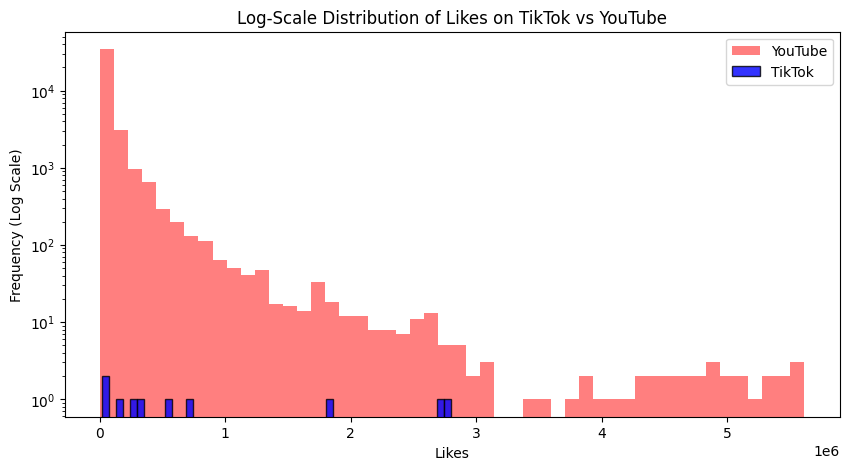

In [ ]:
plt.figure(figsize=(10, 5))

plt.hist(youtube_df['likes'], bins=50, alpha=0.5, label='YouTube', color='red', log=True)

plt.hist(tiktok_df['n_likes'], bins=50, alpha=0.8, label='TikTok', color='blue', edgecolor='black', log=True)

plt.xlabel("Likes")
plt.ylabel("Frequency (Log Scale)")
plt.title("Log-Scale Distribution of Likes on TikTok vs YouTube")
plt.legend()
plt.show()

This histogram compares the distribution of likes on TikTok and YouTube. It reveals whether user engagement is more concentrated on one platform or evenly spread.

<ipython-input-18-ad59a33caaa5>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tiktok_df['like_rate'].dropna(), youtube_df['like_rate'].dropna()], labels=["TikTok", "YouTube"])


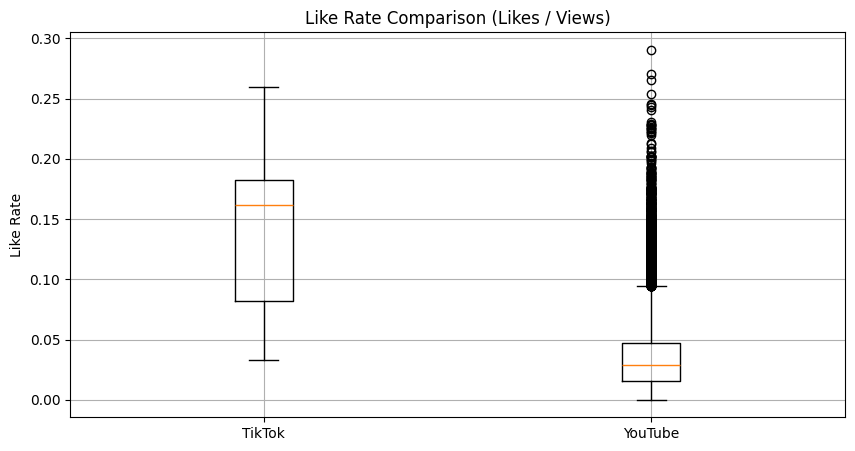

In [ ]:
tiktok_df['like_rate'] = tiktok_df['n_likes'] / tiktok_df['n_plays']
youtube_df['like_rate'] = youtube_df['likes'] / youtube_df['views']

plt.figure(figsize=(10, 5))
plt.boxplot([tiktok_df['like_rate'].dropna(), youtube_df['like_rate'].dropna()], labels=["TikTok", "YouTube"])
plt.title("Like Rate Comparison (Likes / Views)")
plt.ylabel("Like Rate")
plt.grid(True)
plt.show()

This boxplot shows the distribution of like rates (likes divided by views) across platforms. It helps evaluate engagement efficiency.

In [ ]:
summary_table = pd.DataFrame({
    "Platform": ["TikTok", "YouTube"],
    "Average Likes": [tiktok_df['n_likes'].mean(), youtube_df['likes'].mean()],
    "Average Views": [tiktok_df['n_plays'].mean(), youtube_df['views'].mean()],
    "Average Comments": [tiktok_df['n_comments'].mean(), youtube_df['comment_count'].mean()]
})

summary_table

,Platform,Average Likes,Average Views,Average Comments
0,TikTok,932850.000000,7.083480e+06,7946.500000
1,YouTube,74616.772753,2.370839e+06,8287.396196


This table provides a summary of average views, likes, and comments on each platform. It offers a quick numeric comparison of engagement levels.

## **6. Modeling Ideas**

Based on the exploratory data analysis conducted above, I propose the following two model directions:

### 📌 Model 1: Predicting Like Count Based on Video Metrics
**Goal:** Build a regression model to predict the number of likes a video receives based on other measurable factors.

- **Target Variable (Y):** Likes (`n_likes` for TikTok / `likes` for YouTube)
- **Features (X):**
  - Views
  - Comments
  - Shares (for TikTok)
  - Video Length or Tags (optional)
- **Model Type:** Linear Regression or Random Forest Regressor
- **Purpose:** Identify which features most significantly impact audience engagement and how strongly they correlate with popularity.

### 📌 Model 2: Comparing Engagement Efficiency Between Platforms
**Goal:** Statistically test whether there is a significant difference in average like rate (likes / views) between TikTok and YouTube videos.

- **Metric:** Like Rate = Likes / Views
- **Method:** Independent Samples t-test (or Mann-Whitney U if distribution is skewed)
- **Purpose:** To investigate whether one platform generally has more engaged audiences than the other, controlling for view counts.



## **7. GitHub Pages Deployment**
The analysis results will be published on **GitHub Pages**. The repository link is:

🔗 [GitHub Repository: YueWu3160](https://github.com/NoMooncake/YueWu3160)




## **8. Conclusion**
- Successfully loaded **TikTok & YouTube datasets**.
- Conducted **basic ETL** (cleaning, transformation, filtering).
- Computed **descriptive statistics** and generated **visualizations**.
- The project will be hosted on **GitHub Pages**.
